## Naive Bayes Part 2 - Spam Detection

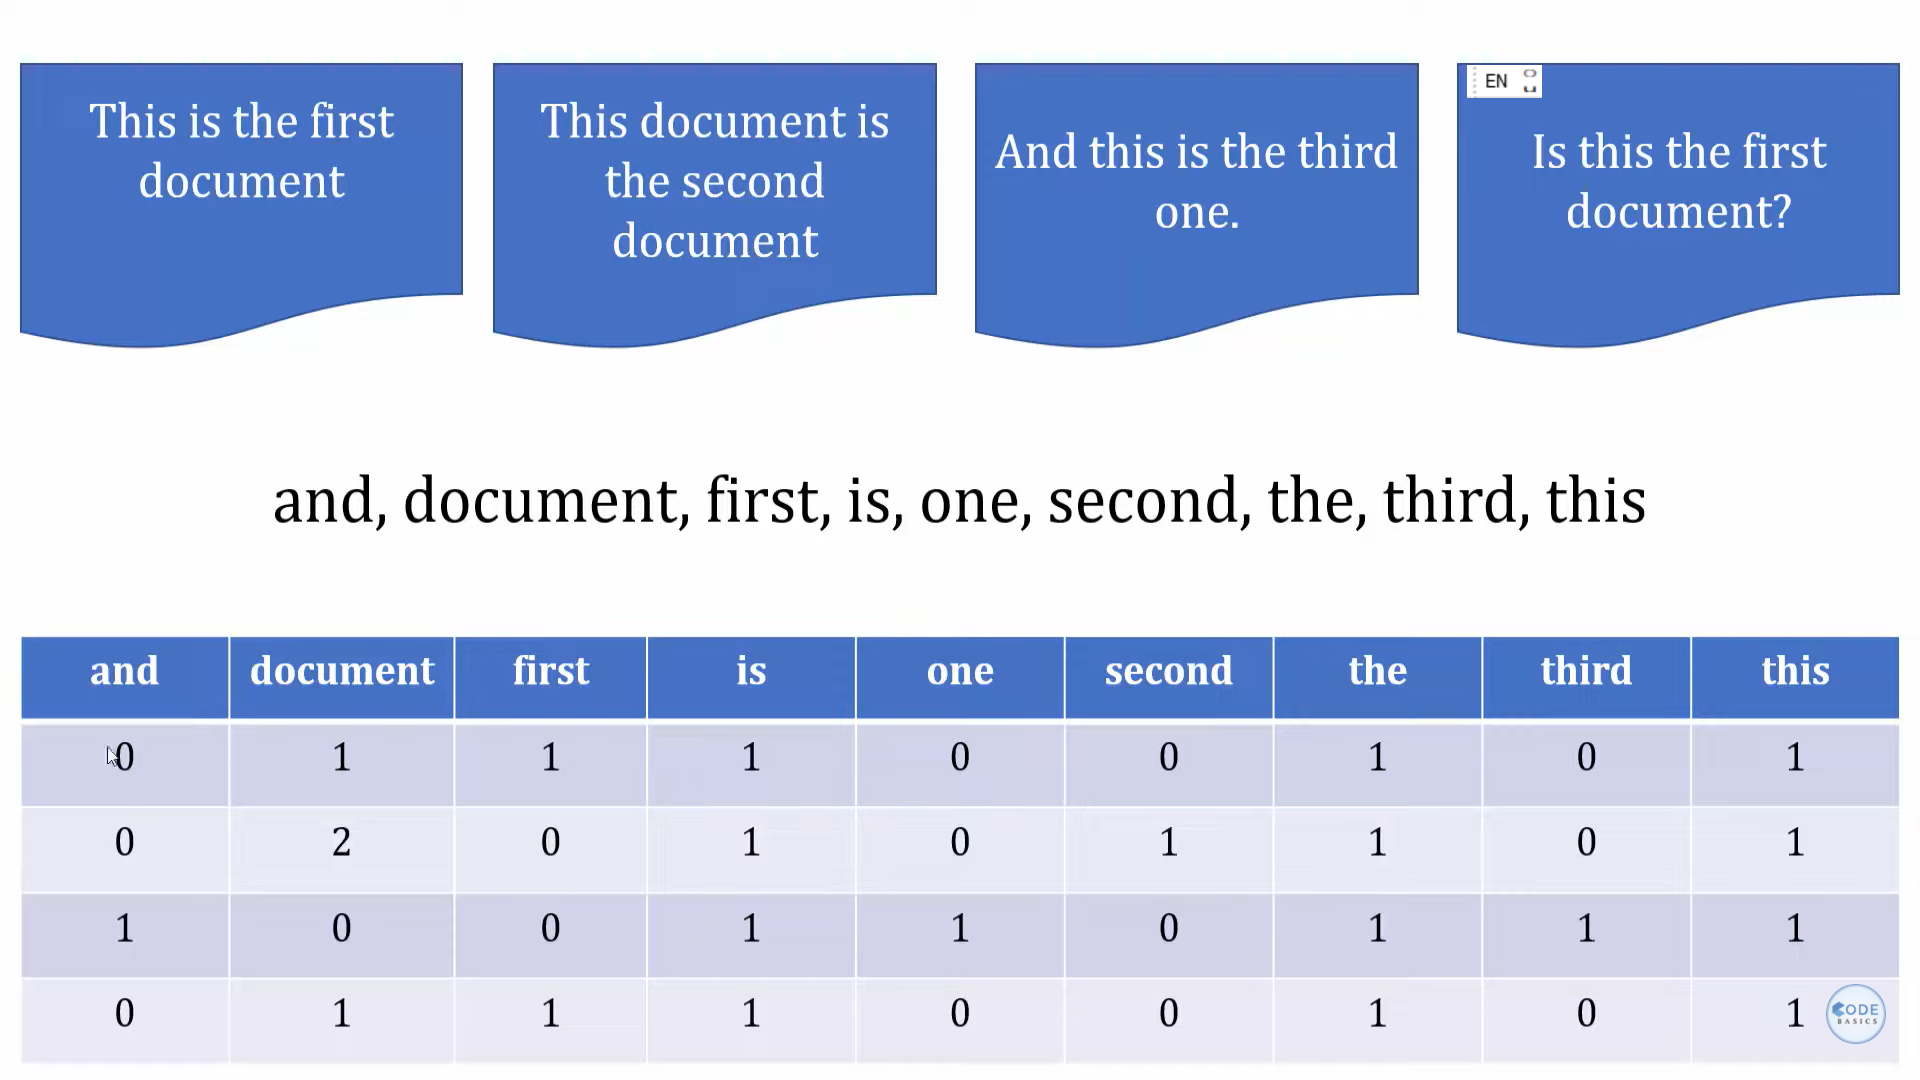
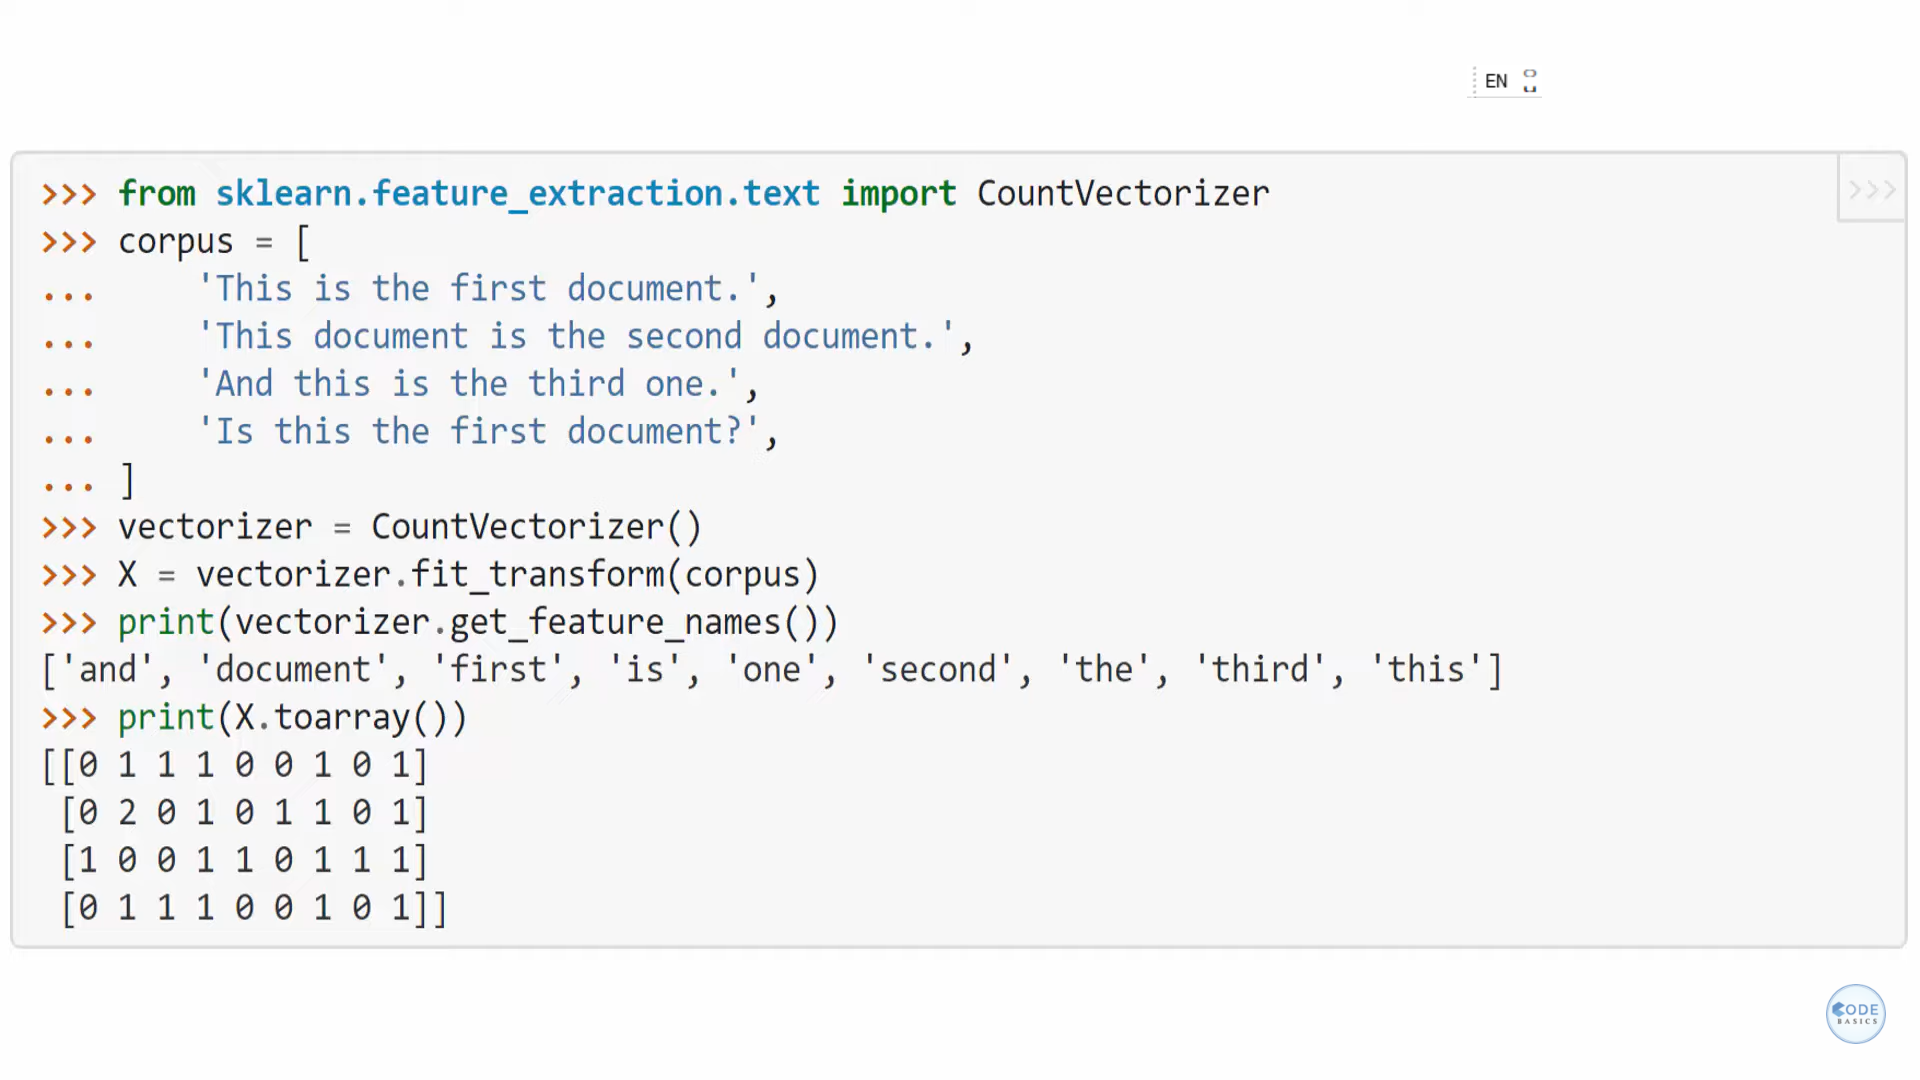
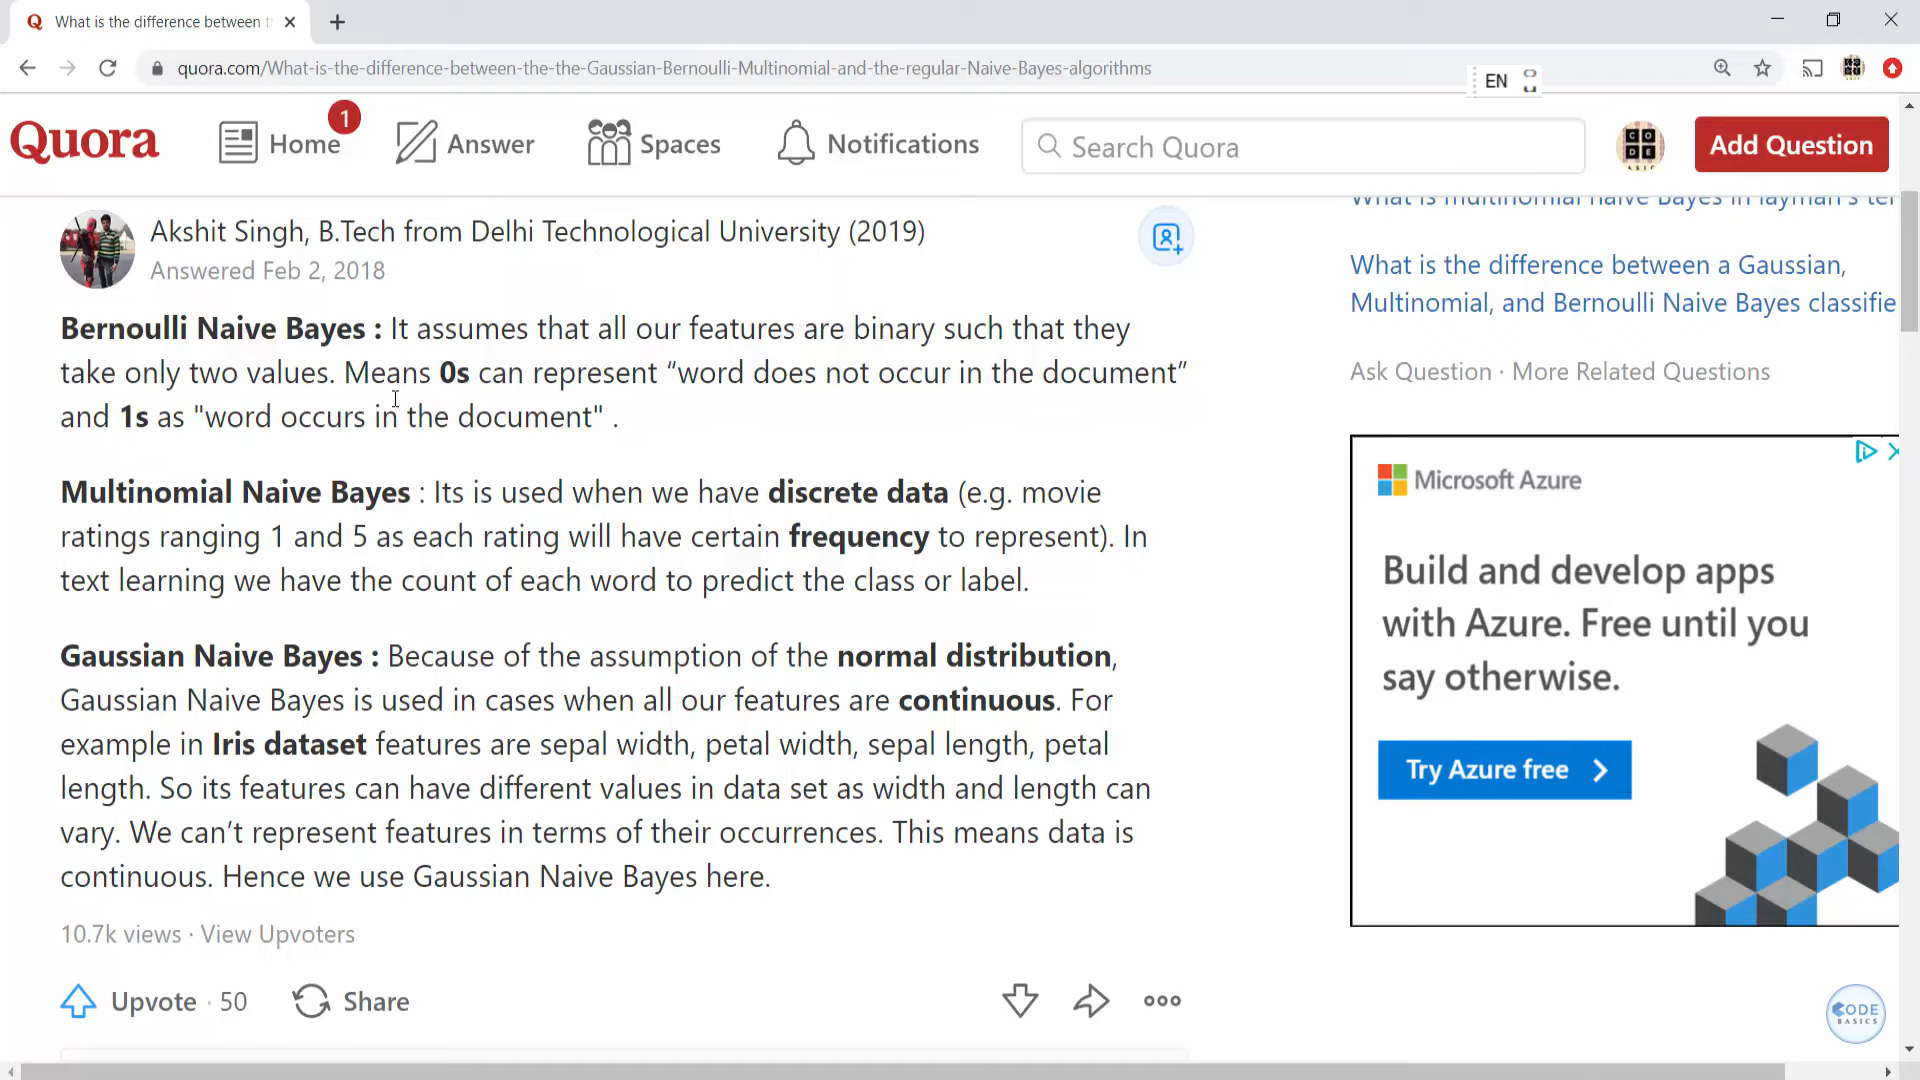

In [1]:
import pandas as pd
df = pd.read_csv('./data/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df['spam']= df.Category.apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#### Prepare Train, Test Data sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25)

In [10]:
X_train.values

array(['Can u get pic msgs to your phone?',
       'I prefer my free days... Tues, wed, fri oso can... Ü ask those workin lor...',
       "Sorry, I can't text &amp; drive coherently, see you in twenty",
       ...,
       "You didn't have to tell me that...now i'm thinking. Plus he's going to stop all your runs",
       'Anything lor... U decide...',
       "Ok. Every night take a warm bath drink a cup of milk and you'll see a work of magic. You still need to loose weight. Just so that you know"],
      dtype=object)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [22]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [25]:
X_test_count = v.transform(X_test)
X_test_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
model.predict(X_test_count)

array([0, 0, 1, ..., 1, 0, 0])

In [27]:
model.score(X_test_count, y_test)

0.9842067480258435

#### Sklearn Pipeline


In [29]:
from sklearn.pipeline import Pipeline
clf = Pipeline(
    [
        ('vectorizer', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

In [30]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
clf.score(X_test, y_test)

0.9842067480258435

In [32]:
clf.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [33]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

clf.predict(emails)

array([0, 1])